1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

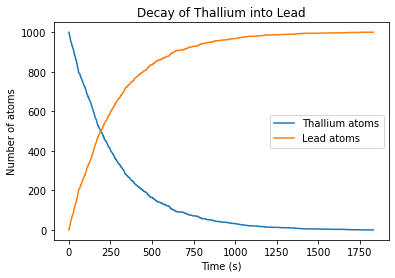

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

def p(t, tau):
    return 1-(2**(-t/tau))

Tau = 3.052*60

element=np.random.random(1000)
Tl=[]
Pb=[]
Time=[]

decayed=0
for t in range(int(10*Tau)):
    
    P = p(t,Tau)
    for i in range(len(element)):
        if element[i] < P:
            decayed +=1
  
    Pb.append(decayed)
    Tl.append(1000-decayed)
    decayed = 0
    Time.append(t)
    
plt.plot(Time,Tl,label='Thallium atoms')
plt.plot(Time,Pb,label='Lead atoms')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.title ('Decay of Thallium into Lead')
plt.legend()



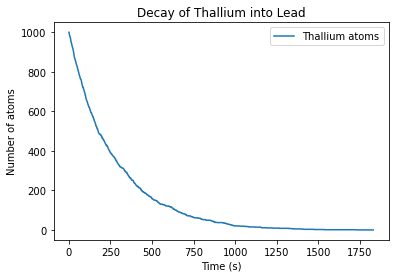

In [2]:
#second part
import math

def pdf(x, tau=3.052*60):
    """PDF of exponential distribution."""
    return (2**(-t/tau))*(np.log(2)/tau)

def cdf(x,tau=3.052*60):
    """CDF of exponetial distribution."""
    return  1-2**(-t/tau) 

def icdf(z, tau=3.052*60):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -tau*math.log(1-z,2)

u = np.random.random(1000)

v = []
for i in range(len(u)):
    v.append(icdf(u[i]))
time_decays = np.array(v)

Tl2=[]
Pb2=[]
time=[]
decayed2 = 0

for t in range(int(10*Tau)):
    
    for i in range(len(time_decays)):
        if t > time_decays[i]:
            decayed2 +=1
  
    Pb2.append(decayed2)
    Tl2.append(1000-decayed2)
    time.append(t)
    decayed2 = 0
    
plt.plot(time, Tl2,label='Thallium atoms')
#plt.scatter(time,Pb2,label='Lead atoms')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.title ('Decay of Thallium into Lead')
plt.legend()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

fraction of particles that bounce back: 0.1687 %


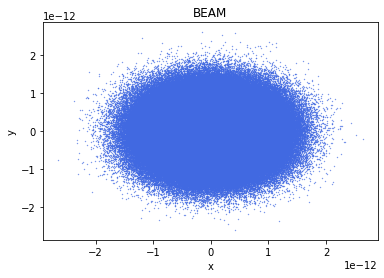

In [3]:
def theta(b):
    Z = 79
    e = 1.6*(10**(-19))
    E = 7.7*(10**6)*e
    eps = 8.85*(10**(-12))
    
    return 2*(np.arctan((Z*e*e)/(2*np.pi*eps*E*b)))
              
#Il fascio avanza lungo l'asse z, mentre gli assi x e y sono gaussiane, se avanzo lungo l'asse z
#il parametro d'impatto sarà la distanza di ogni particella dall'origine 
              
def bigauss(mean,std): 
    #first category
    x = np.random.normal(mean, std, 1000000)
    y = np.random.normal(mean, std, 1000000)
    plt.scatter(x,y,c='royalblue', s=0.1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('BEAM')
    
    b = []
    for i,j in zip(x, y):
        b.append(np.sqrt(i**2+j**2))
    return b
    

alfa = 5.29*(10**-11)
b_param = np.array(bigauss(0,alfa/100))
thetas = theta(b_param)
 

c = 0
for i in thetas:
    if i > (np.pi/2):
        c+= 1

print("fraction of particles that bounce back:", c/len(thetas)*100, "%")


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

Integral value with hit or miss method: 1.4539 +- 0.15408444409774677
integral value with mean value method: 1.450765776904503e-05 +- 0.0011782520782773938


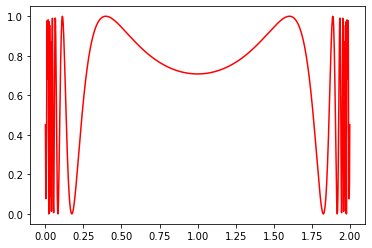

In [4]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2


# Monte Carlo integration with hit or miss
var=[]
N=100000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x):
        count+=1
        var.append(f(x))

I=2*count/N
error = np.std(var) 
print("Integral value with hit or miss method:", I, "+-", error)

x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'r-')

#integral with mean value method
from statistics import variance

f_samp = []
for i in range(N): 
    x=2*np.random.random()     #non avrebbe più senso creare uno spazio lineare(?)
    f_samp.append(f(x))
    
mean = np.mean(f_samp)    
I2 = (2-0)*mean/N

sigma = np.sqrt(variance(f_samp)*(2-0)/N)

print("integral value with mean value method:", I2,"+-",sigma)    

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [5]:
def f(x,y):
    if x**2+y**2 <= 1:
        return 1
    else:
        return 0

N=1000000
f_samp = []

for i in range(N): 
    x=((-1)**N)*np.random.random()
    y=((-1)**N)*np.random.random()             #non avrebbe più senso creare uno spazio lineare(?)
    f_samp.append(f(x,y))
    
print("Area inside a unit ratio circle:",(2*2)*np.sum(f_samp)/N)   #uso la formula I=k*A/N dove k=somma di tutti gli 1 dentro il cerchio, A è l'area x=[-1:1], y=[-1,1]

#generalizzo a 10D 

def f10(x):
    x=x**2
    if np.sum(x) <=1:
        return 1
    else:
        return 0
    
N = 1000000
d = 10
f_samp = []

for i in range(N): 
    
    x = []
    for j in range(d):
        x.append(((-1)**N)*np.random.random())             #non avrebbe più senso creare uno spazio lineare(?)
        
    X=np.array(x)
    f_samp.append(f10(X))

print("Volume inside a unit ratio 10D sphere:",(2**d)*np.sum(f_samp)/N)

Area inside a unit ratio circle: 3.140856
Volume inside a unit ratio 10D sphere: 2.532352


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

0.7599144596331981


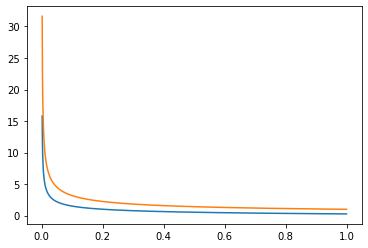

In [6]:
def f(x):
    return x**(-0.5)/(np.exp(x)+1)

def w(x):
    return 1./np.sqrt(x)

x=np.linspace(0.001,0.999,1000)
plt.plot(x,f(x), )
plt.plot(x,w(x))


N=1000000 
somma = 0
for i in range(N):
    x = np.random.random() 
    somma += f(x)/w(x)
    
from scipy.integrate import quad
res, err = quad(w, 0.,1.)

print((1./N)*somma*res)

